# Projeto Analise Exploratória de Dados - Python

## Grupo:
Thais Saori Yoshidome Vieira<br>
Vanessa Lazarin de Souza<br>
Daniel Ribeiro Gulgielmin<br>
Giuliano C Oliveira

### <b>Grupo analisando duas fontes de dados distintas antes de decidir qual prosseguir.</b>

# Fonte de Dados # 1 - Agência Nacional de Petróleo - Brasil - Base Histórica de Preços de Combustíveis
Fonte de dados utilizada: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis

Metadados: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/metadados-serie-historica-precos-combustiveis-1.pdf

Alternativa encontrada no Kaggle: https://www.kaggle.com/datasets/paulogladson/anp-combustveis/data

In [1]:
## Inserir aqui a lista de todas as bibliotecas necessárias para manipulação dos dados

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#Read file using pandas

# df1 = pd.read_csv('arquivos/Preços semestrais - AUTOMOTIVOS_2023.01.csv', sep=';')
df2 = pd.read_csv('arquivos/ca-2022-02.csv', sep=';')
df3 = pd.read_csv('arquivos/precos-semestrais-ca-2022-01.csv', sep=';')
# df4 = pd.read_csv('arquivos/ca-2021-02.csv', sep=';')
# df5 = pd.read_csv('arquivos/ca-2021-01.csv', sep=';')

df = pd.concat([df2, df3], ignore_index=True, sort=False)
df = df.set_axis(['REGIAO', 'ESTADO', 'MUNICIPIO', 'REVENDA', 'CNPJ', 'RUA', 'NUMERO', 'COMPLEMENTO', 'BAIRRO', 'CEP', 'PRODUTO', 'COLETA', 'VENDA', 'COMPRA', 'UNIDADE', 'BANDEIRA'], axis =1)


In [3]:
df['VENDA'] = df['VENDA'].replace(',','.', regex=True).astype(float)
display(df)

,REGIAO,ESTADO,MUNICIPIO,REVENDA,CNPJ,RUA,NUMERO,COMPLEMENTO,BAIRRO,CEP,PRODUTO,COLETA,VENDA,COMPRA,UNIDADE,BANDEIRA
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,7.48,NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,7.38,NaN,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,DIESEL S10,01/07/2022,7.69,NaN,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,5.99,NaN,R$ / litro,VIBRA ENERGIA
4,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,01/07/2022,7.39,NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907497,CO,MT,CUIABA,OZ REVENDEDORA DE COMBUSTIVEIS LTDA,36.757.198/0001-08,AVENIDA SENADOR METELLO,868,NaN,CENTRO-SUL,78020-600,GASOLINA,30/06/2022,6.49,NaN,R$ / litro,BRANCA
907498,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,GASOLINA ADITIVADA,30/06/2022,6.99,NaN,R$ / litro,BRANCA
907499,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,DIESEL S10,30/06/2022,7.59,NaN,R$ / litro,BRANCA
907500,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,DIESEL,30/06/2022,7.55,NaN,R$ / litro,BRANCA


In [4]:
df = df.drop(columns=['MUNICIPIO', 'REVENDA', 'RUA', 'NUMERO','COMPLEMENTO','CEP','BAIRRO'])

In [5]:
df['COLETA'] = pd.to_datetime(df['COLETA'],format="mixed", dayfirst=True)
df.sort_values(by='COLETA', ascending=False)

,REGIAO,ESTADO,CNPJ,PRODUTO,COLETA,VENDA,COMPRA,UNIDADE,BANDEIRA
377969,S,SC,83.778.241/0001-93,GASOLINA,2022-12-30,5.14,NaN,R$ / litro,IPIRANGA
378005,SE,SP,05.550.018/0001-80,GASOLINA,2022-12-30,4.94,NaN,R$ / litro,RAIZEN
377993,SE,SP,07.261.709/0001-90,GASOLINA,2022-12-30,4.57,NaN,R$ / litro,BRANCA
377994,SE,SP,05.921.809/0001-70,DIESEL,2022-12-30,6.49,NaN,R$ / litro,VIBRA ENERGIA
377995,SE,SP,05.921.809/0001-70,GASOLINA ADITIVADA,2022-12-30,4.89,NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...
380974,SE,SP,12.699.197/0001-88,DIESEL S10,2022-01-03,5.19,NaN,R$ / litro,RAIZEN
380973,SE,SP,12.699.197/0001-88,GASOLINA ADITIVADA,2022-01-03,6.79,NaN,R$ / litro,RAIZEN
380972,SE,SP,12.699.197/0001-88,DIESEL,2022-01-03,5.14,NaN,R$ / litro,RAIZEN
380971,SE,SP,12.699.197/0001-88,ETANOL,2022-01-03,4.89,NaN,R$ / litro,RAIZEN


In [6]:
# df['DIA'] = df['COLETA'].dt.day
df['MES'] = df['COLETA'].dt.month
df['ANO'] = df['COLETA'].dt.year
df['DATA'] = df['ANO'].astype(str) + '-' +df['MES'].astype(str)

# df['DATA']= pd.to_datetime(df['MES'] + df['ANO'], format='%m-%Y')

In [7]:
df['PRODUTO'].unique()

array(['GASOLINA ADITIVADA', 'GASOLINA', 'DIESEL S10', 'ETANOL', 'DIESEL',
       'GNV'], dtype=object)

In [8]:
# df['DATA'].dtypes

In [17]:
gasolina = df[df['PRODUTO'] == 'GASOLINA']
gas_stat = gasolina.groupby(['DATA', 'MES','ANO'])['VENDA'].agg(['min','max','mean','std']).sort_values(by='MES', ascending=True).reset_index()
# gas_stat = gasolina.groupby(['DATA', 'MES','ANO'])['VENDA'].agg(['min','max','mean','std']).sort_values(by='MES', ascending=True).reset_index()

# probability density function
# pdf = stats.norm.pdf(gasolina['VENDA'].sort_values(), gas_stat['mean'], gas_stat['std'])

In [11]:
etanol = df[df['PRODUTO'] == 'ETANOL']
etanol_stat = etanol.groupby(['DATA', 'MES','ANO'])['VENDA'].agg(['min','max','mean','std']).sort_values(by='MES', ascending=True).reset_index()
# etanol_stat

In [12]:
gnv = df[df['PRODUTO'] == 'GNV']
gnv_stat = gnv.groupby(['DATA', 'MES','ANO'])['VENDA'].agg(['min','max','mean','std']).sort_values(by='MES', ascending=True).reset_index()


In [13]:
diesel = df[df['PRODUTO'] == 'DIESEL']
diesel_stat = diesel.groupby(['DATA', 'MES','ANO'])['VENDA'].agg(['min','max','mean','std']).sort_values(by='MES', ascending=True).reset_index()

In [14]:
diesel10 = df[df['PRODUTO'] == 'DIESEL S10']
diesel10_stat = diesel10.groupby(['DATA', 'MES','ANO'])['VENDA'].agg(['min','max','mean','std']).sort_values(by='MES', ascending=True).reset_index()
# diesel10_stat

In [15]:
gasolinaadit = df[df['PRODUTO'] == 'GASOLINA ADITIVADA']
gasolinaadit_stat = gasolinaadit.groupby(['DATA', 'MES','ANO'])['VENDA'].agg(['min','max','mean','std']).sort_values(by='MES', ascending=True).reset_index()
# gasolinaadit_stat

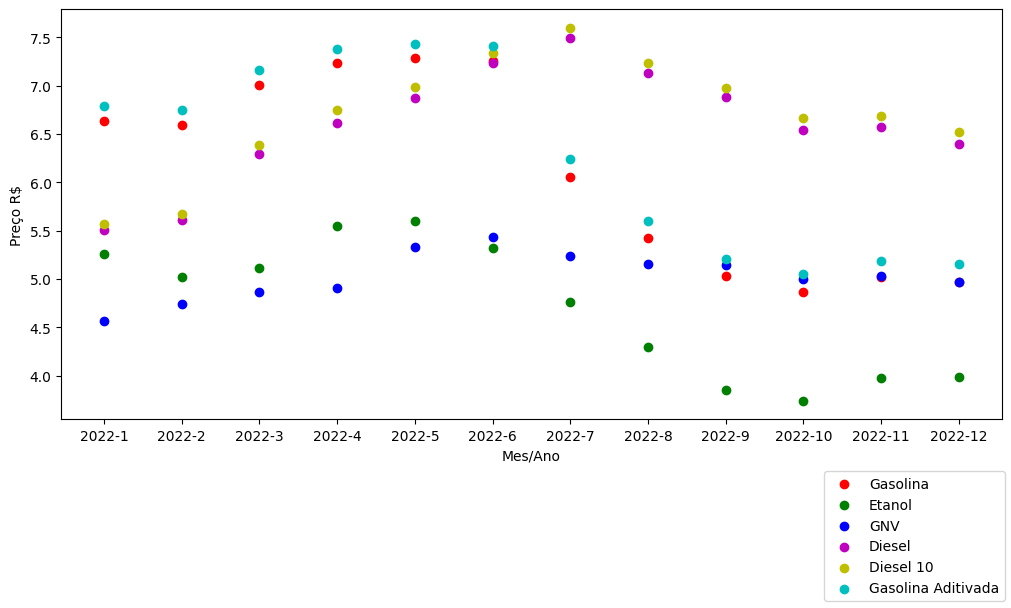

In [70]:
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

plt.scatter(gas_stat['DATA'], gas_stat['mean'], color='r',  marker = 'o', label = 'Gasolina')
plt.scatter(etanol_stat['DATA'], etanol_stat['mean'], color='g', marker = 'o', label = 'Etanol')
plt.scatter(gnv_stat['DATA'], gnv_stat['mean'], color='b', marker = 'o', label = 'GNV')
plt.scatter(diesel_stat['DATA'], diesel_stat['mean'], color='m', marker = 'o', label = 'Diesel')
plt.scatter(diesel10_stat['DATA'], diesel10_stat['mean'], color='y', marker = 'o', label = 'Diesel 10')
plt.scatter(gasolinaadit_stat['DATA'], gasolinaadit_stat['mean'], color='c', marker = 'o', label = 'Gasolina Aditivada')
plt.xlabel('Mes/Ano', fontsize = 10)
plt.ylabel('Preço R$', fontsize = 10)

fig.legend(loc='outside lower right')
plt.show()

# ax = fig.add_subplot(111)
# for i, v in enumerate( gas_statisct['mean']):
#     ax.annotate(str(v), xy=(i,v), xytext=(-7,7), textcoords= 'offset points')


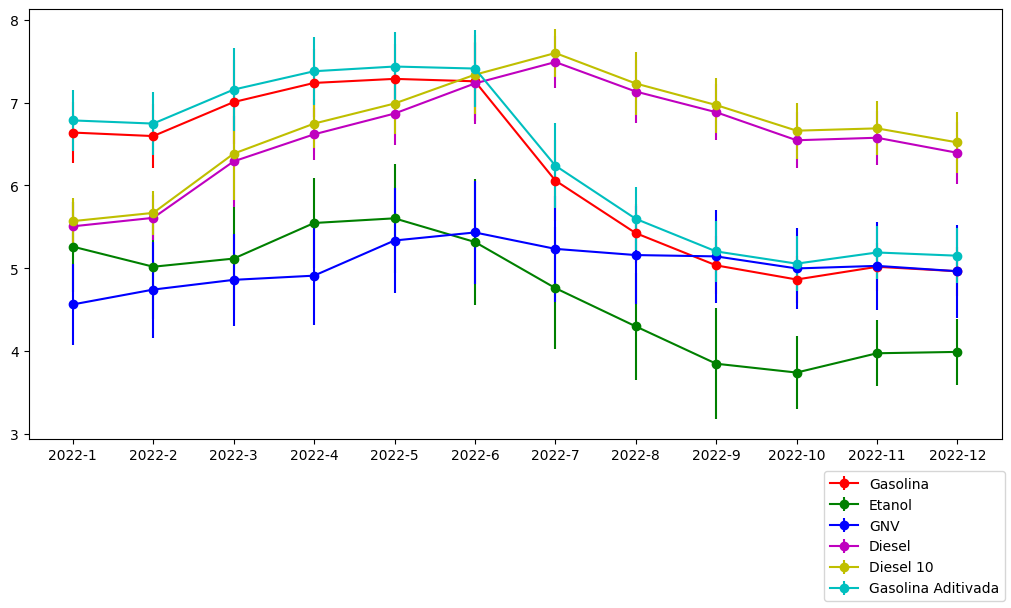

In [71]:
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')


plt.errorbar(gas_stat['DATA'], gas_stat['mean'], gas_stat['std'] , color='r',  marker = 'o', label = 'Gasolina')
plt.errorbar(etanol_stat['DATA'], etanol_stat['mean'], etanol_stat['std'] , color='g', marker = 'o', label = 'Etanol')
plt.errorbar(gnv_stat['DATA'], gnv_stat['mean'], gnv_stat['std'] , color='b', marker = 'o', label = 'GNV')
plt.errorbar(diesel_stat['DATA'], diesel_stat['mean'], diesel_stat['std'] , color='m', marker = 'o', label = 'Diesel')
plt.errorbar(diesel10_stat['DATA'], diesel10_stat['mean'], diesel10_stat['std'] , color='y', marker = 'o', label = 'Diesel 10')
plt.errorbar(gasolinaadit_stat['DATA'], gasolinaadit_stat['mean'], gasolinaadit_stat['std'] , color='c', marker = 'o', label = 'Gasolina Aditivada')

fig.legend(loc='outside lower right')
plt.show()

# ax = fig.add_subplot(111)
# for i, v in enumerate( gas_statisct['mean']):
#     ax.annotate(str(v), xy=(i,v), xytext=(-7,7), textcoords= 'offset points')


Text(0, 0.5, 'Frequencia')

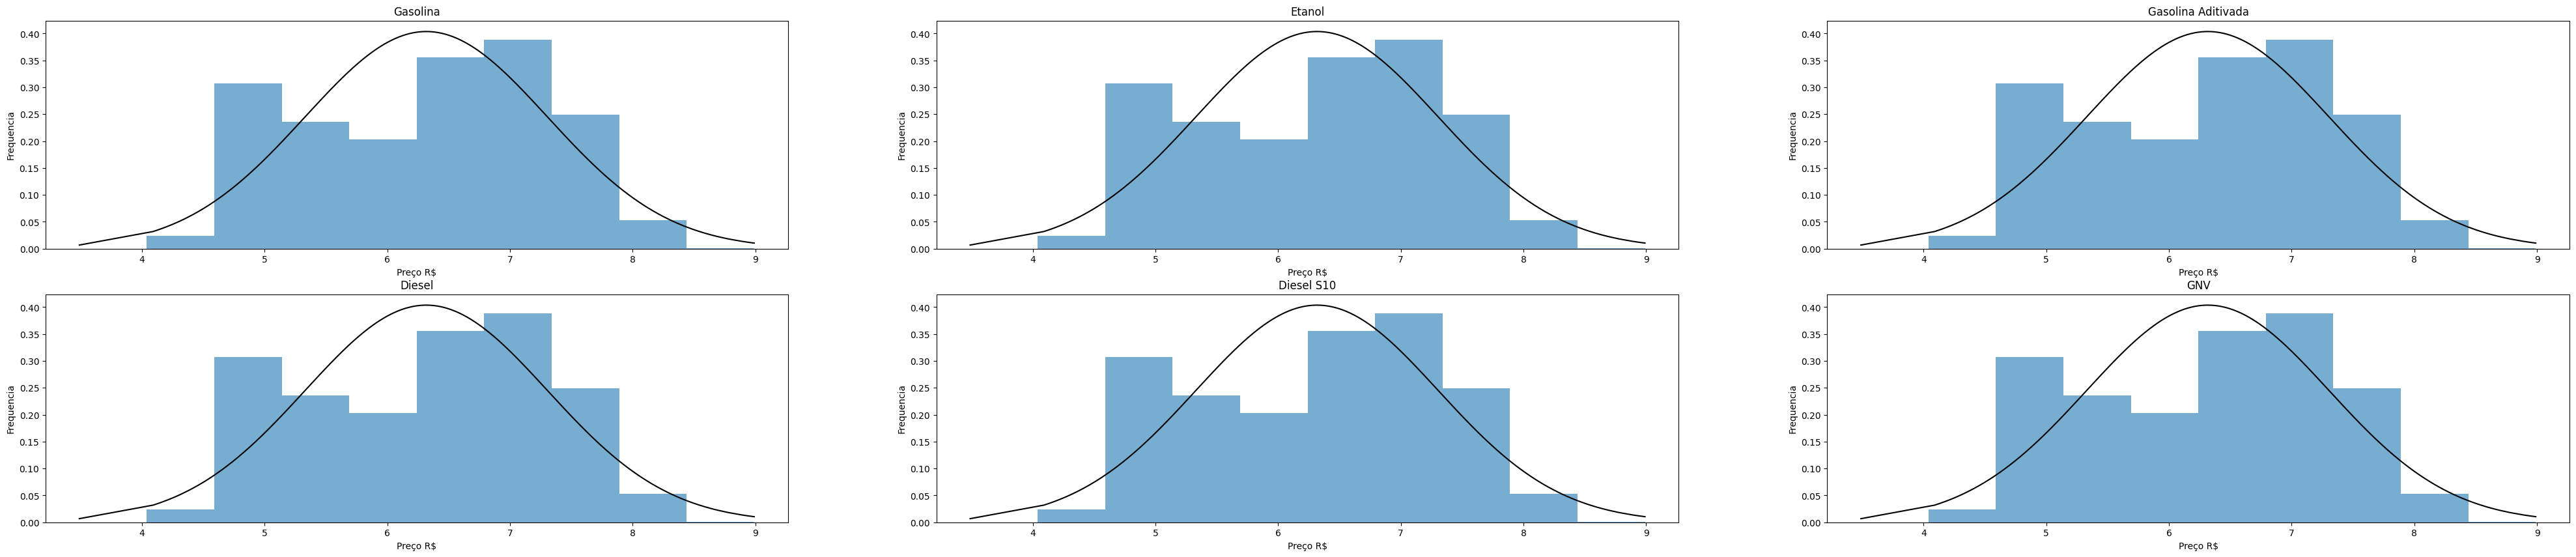

In [60]:
gas_mean = np.mean(gasolina['VENDA'])
gas_std = np.std(gasolina['VENDA'])

# probability density function
pdf = stats.norm.pdf(gasolina['VENDA'].sort_values(), gas_mean, gas_std)

fig = plt.figure(figsize=(50, 10))

plt.subplot(2,3,1)
plt.hist(gasolina['VENDA'], bins = 10, density=True, alpha=0.6)
plt.plot(gasolina['VENDA'].sort_values(),pdf,'k')
plt.title('Gasolina')
plt.xlabel('Preço R$')
plt.ylabel('Frequencia')

#QTD LINHAS, QTD COLUNA, ORDEM
plt.subplot(2,3,2)
plt.hist(gasolina['VENDA'], bins = 10, density=True, alpha=0.6)
plt.plot(gasolina['VENDA'].sort_values(),pdf,'k')
plt.title('Etanol')
plt.xlabel('Preço R$')
plt.ylabel('Frequencia')

plt.subplot(2,3,3)
plt.hist(gasolina['VENDA'], bins = 10, density=True, alpha=0.6)
plt.plot(gasolina['VENDA'].sort_values(),pdf,'k')
plt.title('Gasolina Aditivada')
plt.xlabel('Preço R$')
plt.ylabel('Frequencia')

plt.subplot(2,3,4)
plt.hist(gasolina['VENDA'], bins = 10, density=True, alpha=0.6)
plt.plot(gasolina['VENDA'].sort_values(),pdf,'k')
plt.title('Diesel')
plt.xlabel('Preço R$')
plt.ylabel('Frequencia')

plt.subplot(2,3,5)
plt.hist(gasolina['VENDA'], bins = 10, density=True, alpha=0.6)
plt.plot(gasolina['VENDA'].sort_values(),pdf,'k')
plt.title('Diesel S10')
plt.xlabel('Preço R$')
plt.ylabel('Frequencia')

plt.subplot(2,3,6)
plt.hist(gasolina['VENDA'], bins = 10, density=True, alpha=0.6)
plt.plot(gasolina['VENDA'].sort_values(),pdf,'k')
plt.title('GNV')
plt.xlabel('Preço R$')
plt.ylabel('Frequencia')

### Gasolina

#### Analise Brasil

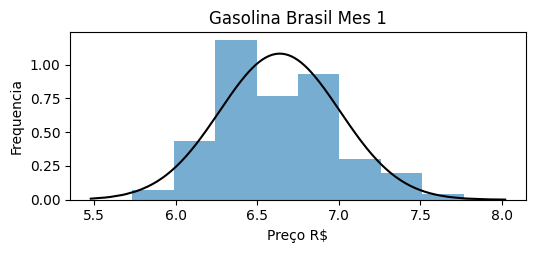

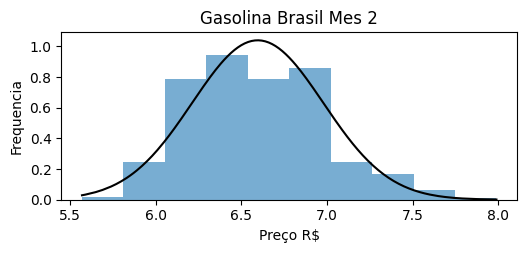

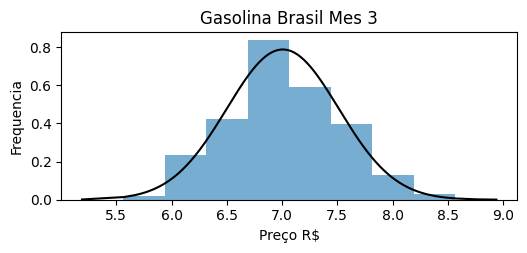

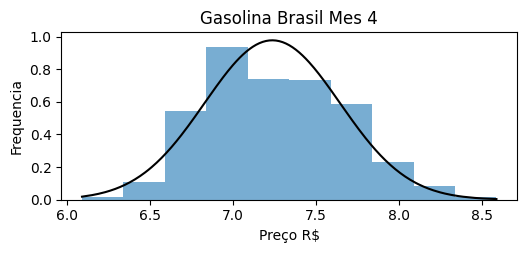

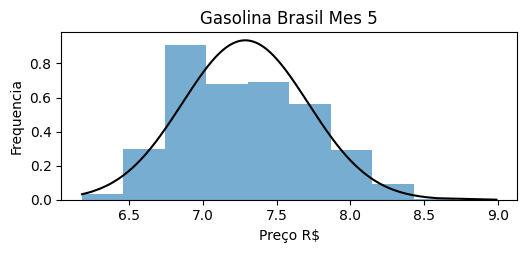

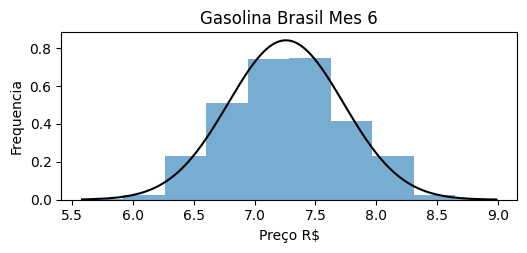

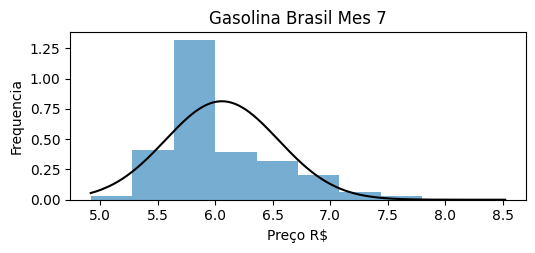

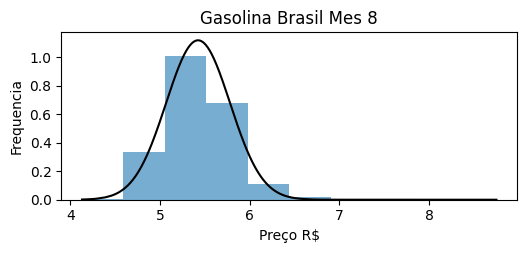

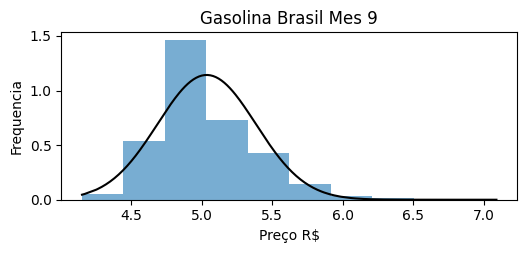

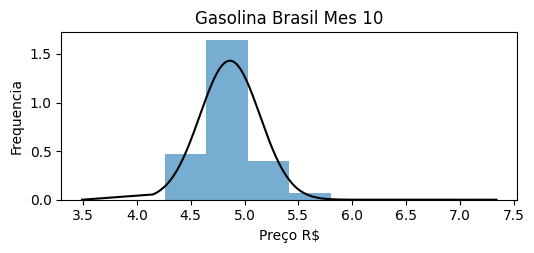

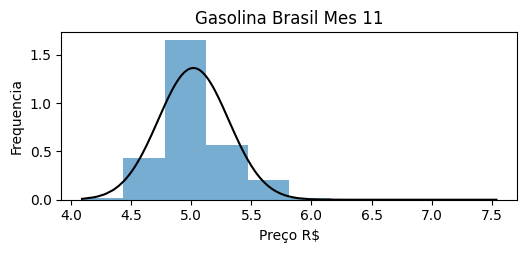

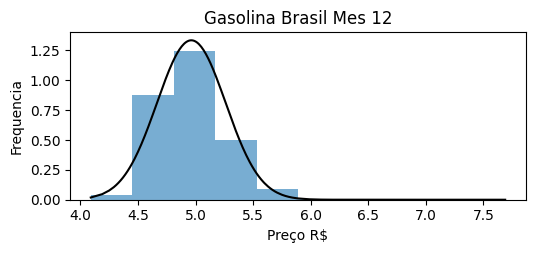

In [149]:
for i in (sorted(gasolina['MES'].unique())):
    gas_month = gasolina['VENDA'].loc[gasolina['MES'] == i]
    gas_mean = np.mean(gas_month)
    gas_std = np.std(gas_month)
    pdf = stats.norm.pdf(gas_month.sort_values(), gas_mean, gas_std)
    
    fig = plt.figure(figsize=(20, 10))
    title = 'Gasolina Brasil Mes ' + str(i)
    plt.subplot(4,3,i)
    plt.hist(gas_month, bins = 10, density=True, alpha=0.6)
    plt.plot(gas_month.sort_values(),pdf,'k')
    plt.xlabel('Preço R$')
    plt.ylabel('Frequencia')
    plt.title(title)


#### Analise Parana/Mes

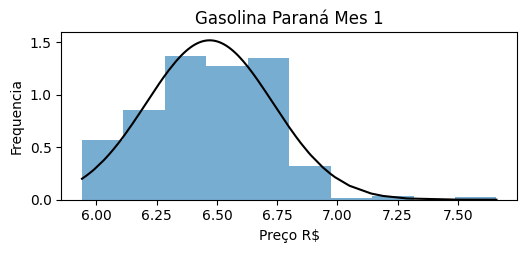

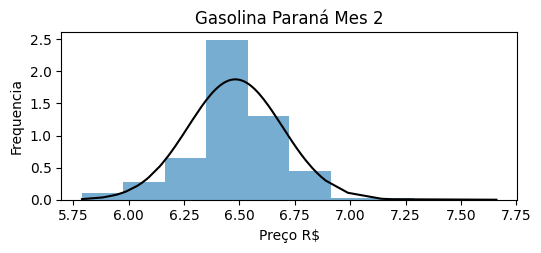

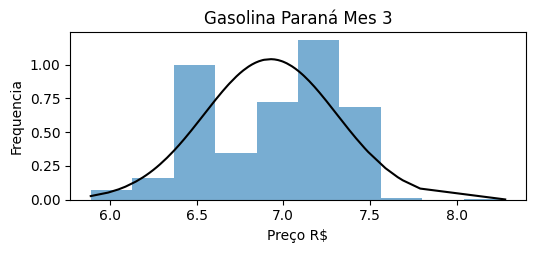

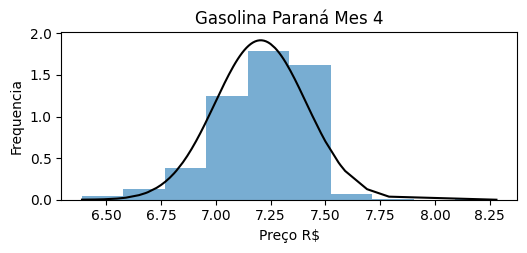

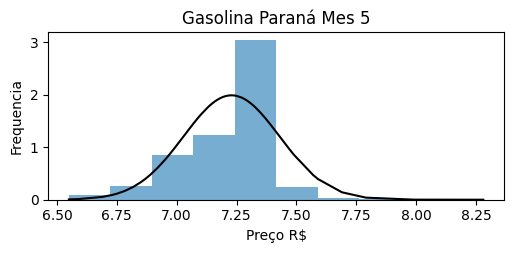

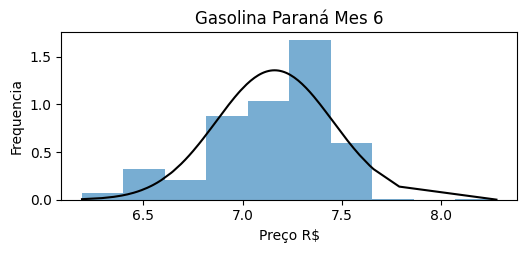

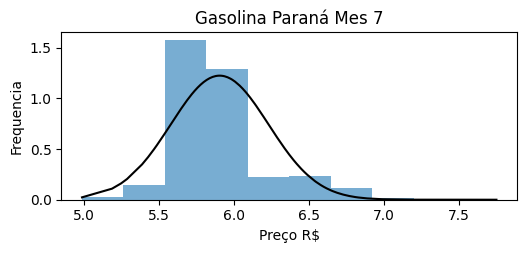

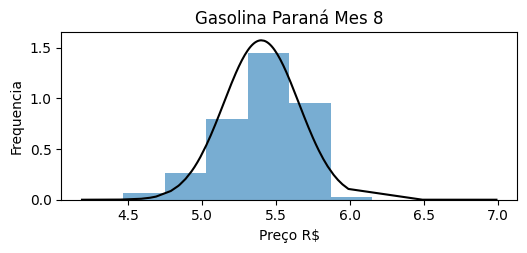

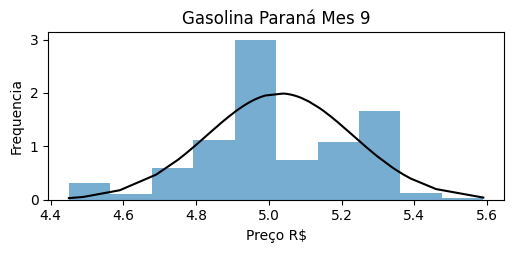

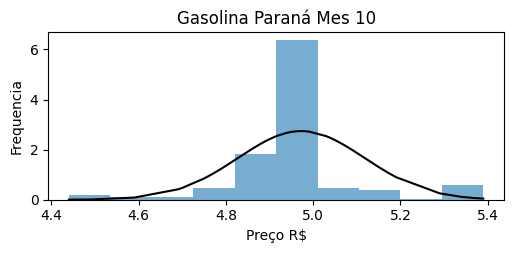

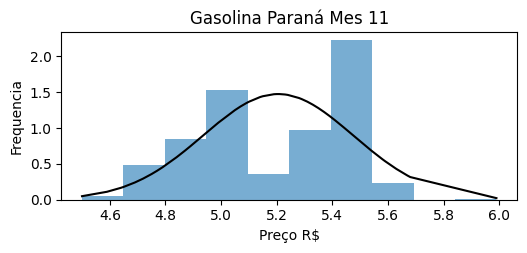

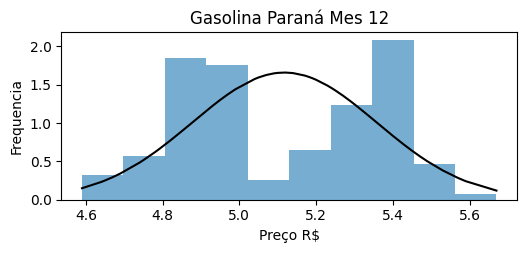

In [134]:
for i in (sorted(gasolina['MES'].unique())):
    gas_pr = gasolina['VENDA'].loc[gasolina['MES'] == i].loc[gasolina['ESTADO'] =='PR']
    gas_pr_mean = np.mean(gas_pr)
    gas_pr_std = np.std(gas_pr)
    pdf = stats.norm.pdf(gas_pr.sort_values(), gas_pr_mean, gas_pr_std)
    
    fig = plt.figure(figsize=(20, 10))
    title = 'Gasolina Paraná Mes ' + str(i)
    plt.subplot(4,3,i)
    plt.hist(gas_pr, bins = 10, density=True, alpha=0.6)
    plt.plot(gas_pr.sort_values(),pdf,'k')
    plt.xlabel('Preço R$')
    plt.ylabel('Frequencia')
    plt.title(title)

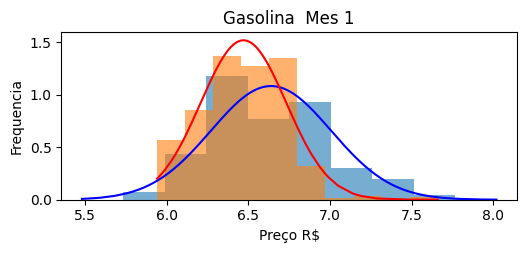

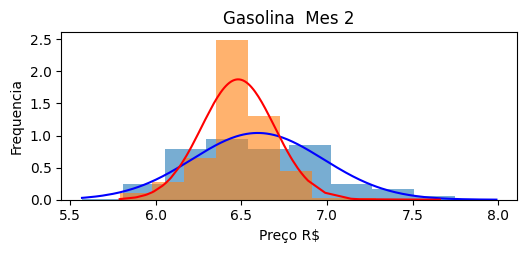

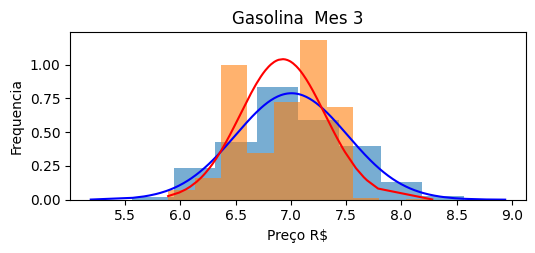

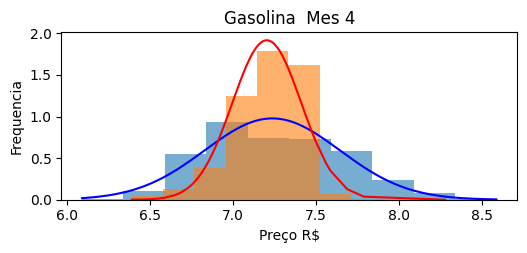

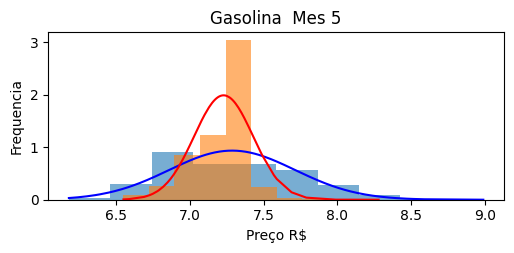

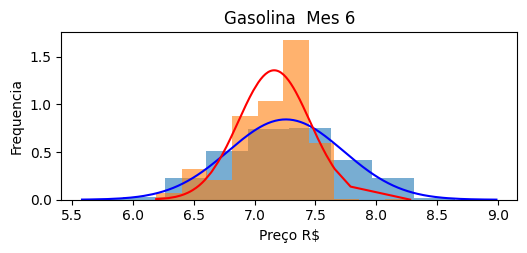

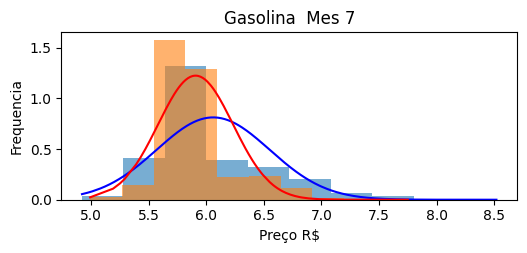

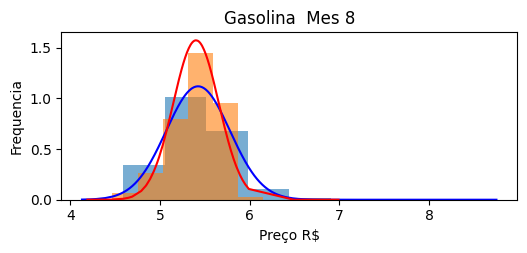

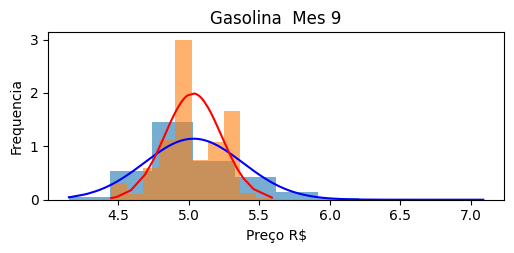

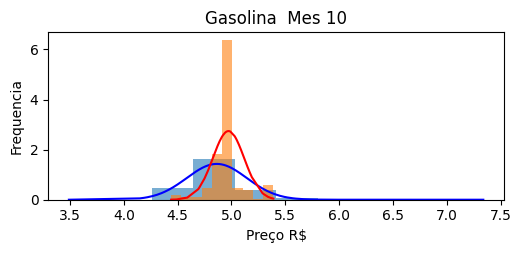

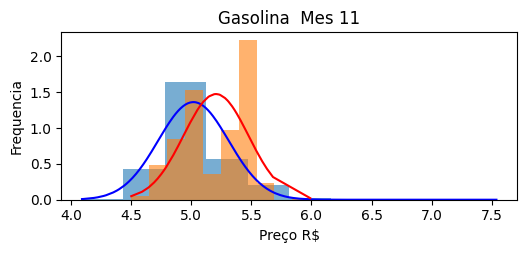

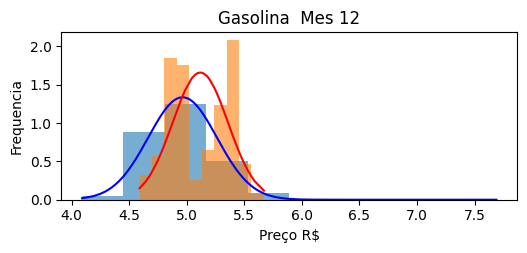

In [155]:
for i in (sorted(gasolina['MES'].unique())):
    # Cálculo Brasil
    gas_month = gasolina['VENDA'].loc[gasolina['MES'] == i]
    gas_mean = np.mean(gas_month)
    gas_std = np.std(gas_month)
    pdf = stats.norm.pdf(gas_month.sort_values(), gas_mean, gas_std)
    
    # Cálculo Paraná
    gas_pr = gasolina['VENDA'].loc[gasolina['MES'] == i].loc[gasolina['ESTADO'] =='PR']
    gas_pr_mean = np.mean(gas_pr)
    gas_pr_std = np.std(gas_pr)
    pdf_pr = stats.norm.pdf(gas_pr.sort_values(), gas_pr_mean, gas_pr_std)
    
    fig = plt.figure(figsize=(20, 10))
    
    title = 'Gasolina  Mes ' + str(i)
    plt.subplot(4,3,i)
    plt.hist(gas_month, bins = 10, density=True, alpha=0.6)
    plt.plot(gas_month.sort_values(),pdf,'b', label = 'Brasil')
    plt.xlabel('Preço R$')
    plt.ylabel('Frequencia')
    plt.title(title)
    
    plt.hist(gas_pr, bins = 10, density=True, alpha=0.6)
    plt.plot(gas_pr.sort_values(),pdf_pr,'r', label = 'Parana')
    plt.xlabel('Preço R$')
    plt.ylabel('Frequencia')

    # fig.legend(['test'])



